# Disciple - 取引シミュレーション（Jupyter用）

In [65]:
import datetime
import os
import re

import matplotlib.dates as mdates
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.interpolate import griddata

from funcs.conv import conv_transaction_df2html
from funcs.setting import load_setting, get_trend_footer
from funcs.tide import get_date_dir_from_file, get_date_str_from_file_2
from funcs.tse import get_ticker_name_list
from modules.disciple import Disciple
from structs.res import AppRes

In [66]:
# デバッグモード
debug = False

res = AppRes()
excel = "ticks_20260130.xlsx"
# code = "285A"
#code = "7011"
# code = "7203"
# code = "8306"
code = "8410"
# code = "9984"

dict_ts = dict()
dict_ts['datetime_str_2'] = get_date_str_from_file_2(excel)
dict_setting = load_setting(res, code)
title_str = get_trend_footer(dict_ts, dict_setting)

date_str = get_date_dir_from_file(excel)
print(date_str)

app = Disciple(excel, code, dict_setting)
app.run()

2026/01/30
パラメータ
PERIOD_WARMUP : 30
PERIOD_MA_1 : 30
PERIOD_MA_2 : 600
LOSSCUT_1 : -5.0
N_MINUS_MAX : 90
DD_PROFIT : 3.0
DD_RATIO : 0.5


In [67]:
# Matplotlib の共通設定
FONT_PATH = "fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()

In [68]:
# テクニカル指標
print("テクニカル指標")
df_tech = app.getTechnicals()
print(df_tech)

テクニカル指標
                               ts  price         ma1         ma2  cross1  \
2026-01-30 09:00:04  1.769731e+09  295.5  295.500000  295.500000     0.0   
2026-01-30 09:00:06  1.769731e+09  295.0  295.250000  295.250000     0.0   
2026-01-30 09:00:08  1.769731e+09  295.2  295.233333  295.233333     0.0   
2026-01-30 09:00:10  1.769731e+09  295.3  295.250000  295.250000     0.0   
2026-01-30 09:00:12  1.769731e+09  295.4  295.280000  295.280000     0.0   
...                           ...    ...         ...         ...     ...   
2026-01-30 15:24:41  1.769754e+09  297.7  297.733333  297.604833     0.0   
2026-01-30 15:24:43  1.769754e+09  297.7  297.733333  297.604667     0.0   
2026-01-30 15:24:45  1.769754e+09  297.7  297.733333  297.604500     0.0   
2026-01-30 15:24:47  1.769754e+09  297.7  297.733333  297.604500     0.0   
2026-01-30 15:24:49  1.769754e+09  297.7  297.733333  297.604500     0.0   

                     profit  profit_max  drawdown  dd_ratio  n_minus  
2026-01-

tmp/2026/01/30/8410_trend_technical.png


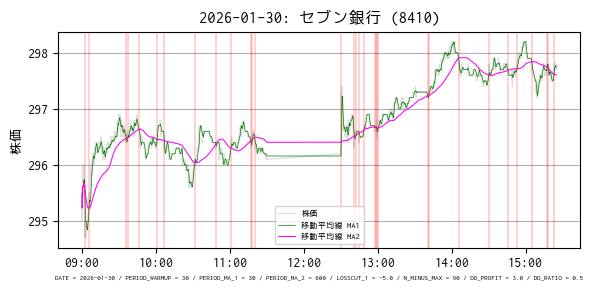

In [69]:
n = 1

if n == 1:
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.grid(axis="y")
else:
    fig = plt.figure(figsize=(6, 8))
    ax = dict()
    gs = fig.add_gridspec(
        n, 1, wspace=0.0, hspace=0.0, height_ratios=[2 if i == 0 else 1 for i in range(n)]
    )
    for i, axis in enumerate(gs.subplots(sharex="col")):
        ax[i] = axis
        ax[i].grid(axis="y")

name = get_ticker_name_list([code])[code]
ax.set_title(f"{dict_ts['datetime_str_2']}: {name} ({code})")
ax.plot(df_tech["price"], linewidth=1, color="gray", alpha=0.25, label="株価")
ax.plot(df_tech["ma1"], linewidth=0.5, color="green", label="移動平均線 MA1")
ax.plot(df_tech["ma2"], linewidth=0.75, color="magenta", label="移動平均線 MA2")
ax.set_xlabel(title_str, fontsize=5)
ax.set_ylabel("株価")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.legend(fontsize=6)

list_cross = df_tech[df_tech["cross1"] != 0].index
for t in list_cross:
    ax.axvline(x=t, color="red", linestyle="solid", linewidth=0.25)

#plt.suptitle(title_str, fontsize=5)
plt.tight_layout()
#plt.subplots_adjust(top=0.89)
output = os.path.join(output_dir, f"{code}_trend_technical.png")
print(output)
plt.savefig(output)
plt.show()